 # <br><br><center>Walmart - Confidence Interval and CLT</center>

### Business Problem 

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Problem Statements

1. Viewing the overall information about the dataset.<br>
2. Data types of each columns.<br>
3. Statistical summary of the numerical variables in the dataset.<br>
4. Checking the summary of non-numerical values in the dataset.<br>
5. Statistical summary based on Gender.<br>
6. Count of null values in dataset.<br>
7. Number of unique values in data.<br>
8. Replacing the values in Marital_Status 0 and 1 into Unmarried and Married.<br>
9. Probability of Marital_Status based on Gender.<br>
10. Probability of gender based on age.<br>
11. Outlier check based on Purchase of each Gender.<br>
12. Analysing data based on gender male and removing outlier values.<br>
13. Analysing data based on gender female and removing outlier values.<br>
14. Average Purchase of all male and female customers.<br>
15. Checking Normal distribution of purchase by male.<br>
16. Confidence interval of purchase by male.<br>
17. Checking Normal distribution of purchase by female.<br>
18. Confidence interval of purchase by female.<br>
19. Outlier check on Purchase based on marital status.<br>
20. Analysing data based on merital status Unmarried and removing outlier values.<br>
21. Analysing data based on merital status Married and removing outlier values.<br>
22. Checking Normal distribution of purchase by unmarried people.<br>
23. Confidence interval of purchase by unmarried people.<br>
24. Checking Normal distribution of purchase by married people.<br>
25. Confidence interval of purchase by married people.<br>
26. Analysis based on age.<br>
27. Checking Normal distribution of purchase by people of age 0 - 17.<br>
28. Checking Normal distribution of purchase by people of age 18 - 25.<br>
29. Checking Normal distribution of purchase by people of age 26 - 35.<br>
30. Checking Normal distribution of purchase by people of age 36-45.<br>
31. Checking Normal distribution of purchase by people of age 46-50.<br>
32. Checking Normal distribution of purchase by people of age 51 - 55.<br>
33. Checking Normal distribution of purchase by people of age 55+.<br>
34. Analysis based on Marital_Status.<br>
35. Analysis based on age.<br>
36. Most selling 5 products in Walmart.<br>
37. Analysis based on Occupation.<br>
38. Analysis based on City_Category.<br>
39. Analysis based on Stay_In_Current_City_Years.<br>
40. Analysis based on Product_Category.<br>
41. Relation between age and gender.<br>
42. Relation between age and Marital_Status.<br>
43. Analysing City_Category based on age and purchase.<br>
44. Analysing occupation based on purchase.<br>
45. Analysing the relationships between numerical variables.<br>


###### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,probplot
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

###### Reading data

In [3]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [4]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


###### First 10 rows of data

In [5]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


###### Last 10 rows of data

In [6]:
data.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


###### Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary .

###### Shape of the data

In [1]:
data.shape

NameError: name 'data' is not defined

##### Viewing the overall information about the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


###### Data types of each columns

In [9]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

###### Statistical summary of the numerical variables in the dataset

In [10]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


###### Checking the summary of non-numerical values in the dataset

In [11]:
data.describe(exclude = 'number')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


###### Statistical summary based on Gender

In [12]:
data.loc[data['Gender']=='M',['Purchase']].describe()

,Purchase
count,414259.00000
mean,9437.52604
std,5092.18621
min,12.00000
25%,5863.00000
50%,8098.00000
75%,12454.00000
max,23961.00000


In [13]:
data.loc[data['Gender']=='F',['Purchase']].describe()

,Purchase
count,135809.000000
mean,8734.565765
std,4767.233289
min,12.000000
25%,5433.000000
50%,7914.000000
75%,11400.000000
max,23959.000000


###### Count of null values in dataset

In [14]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

###### Number of unique values in data

In [15]:
for i in data.columns:
    print(i,':',data[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


###### Unique Gender in dataset

In [16]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

###### Count of each unique Gender

In [17]:
data.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

###### Unique City_Category in dataset

In [18]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

###### Count of each unique City_Category

In [19]:
data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

###### Unique Occupation in dataset

In [20]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

###### Count of each unique Occupation

In [21]:
data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

###### Unique Stay_In_Current_City_Years in dataset

In [22]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

###### Count of each unique Stay_In_Current_City_Years

In [23]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

###### Unique Product_Category in dataset

In [24]:
data['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

###### Count of each unique Product_Category

In [25]:
data['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

###### Unique Marital_Status in dataset

In [26]:
data['Marital_Status'].unique()

array([0, 1], dtype=int64)

###### Count of each unique Marital_Status

In [27]:
data['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

###### Replacing the values in Marital_Status 0 and 1 into Unmarried and Married.

In [28]:
data['Marital_Status']=data['Marital_Status'].replace(0,"Unmarried")

In [29]:
data['Marital_Status']=data['Marital_Status'].replace(1,"Married")

In [30]:
data['Marital_Status'].unique()

array(['Unmarried', 'Married'], dtype=object)

###### Probability of Marital_Status based on Gender

In [151]:
dms=pd.crosstab(data['Marital_Status'],data['Gender'],margins=True)

In [152]:
dms

Gender,F,M,All
Marital_Status,,,
Married,56988,168349,225337
Unmarried,78821,245910,324731
All,135809,414259,550068


In [153]:
dms['P(Female | Marital_Status )']=(dms.F/dms.All)*100

In [154]:
dms['P(Male | Marital_Status )']=(dms.M/dms.All)*100

In [155]:
dms.round(2)

Gender,F,M,All,P(Female | Marital_Status ),P(Male | Marital_Status )
Marital_Status,,,,,
Married,56988,168349,225337,25.29,74.71
Unmarried,78821,245910,324731,24.27,75.73
All,135809,414259,550068,24.69,75.31


<b>Insights :</b><br>
###### ---> Based on the observation we can say that the probability of  marital status of female married is 25.29% of the total observations.
###### ---> Based on the observation we can say that the probability of  marital status of male married is 74.71% of the total observations.
###### ---> Based on the observation we can say that the probability of  marital status of female unmarried is 24.27% of the total observations.
###### ---> Based on the observation we can say that the probability of  marital status of male unmarried is 75.73% of the total observations.


###### Unique Age in dataset

In [36]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

###### Count of each unique Age

In [37]:
data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

###### Probability of gender based on age

In [146]:
da=pd.crosstab(data['Age'],data['Gender'],margins=True)

In [147]:
da

Gender,F,M,All
Age,,,
0-17,5083,10019,15102
18-25,24628,75032,99660
26-35,50752,168835,219587
36-45,27170,82843,110013
46-50,13199,32502,45701
51-55,9894,28607,38501
55+,5083,16421,21504
All,135809,414259,550068


In [148]:
da['P(Female | Age )']=(da.F/da.All)*100

In [149]:
da['P(Male | Age )']=(da.M/da.All)*100

In [150]:
da.round(2)

Gender,F,M,All,P(Female | Age ),P(Male | Age )
Age,,,,,
0-17,5083,10019,15102,33.66,66.34
18-25,24628,75032,99660,24.71,75.29
26-35,50752,168835,219587,23.11,76.89
36-45,27170,82843,110013,24.70,75.30
46-50,13199,32502,45701,28.88,71.12
51-55,9894,28607,38501,25.70,74.30
55+,5083,16421,21504,23.64,76.36
All,135809,414259,550068,24.69,75.31


<b>Insights :</b><br>
###### ---> Based on the observation we can say that the probability of  female in age 0 - 17 is 33.66% of the total observations.
###### ---> Based on the observation we can say that the probability of  male in age 0 - 17 is 66.34% of the total observations.
###### ---> Based on the observation we can say that the probability of  female in age 18 - 25 is 24.71% of the total observations.
###### ---> Based on the observation we can say that the probability of  male in age 18 - 25 is 75.29% of the total observations.
###### ---> Based on the observation we can say that the probability of  female in age 26 - 35 is 23.11% of the total observations.
###### ---> Based on the observation we can say that the probability of  male in age 26 - 35 is 76.89% of the total observations.
###### ---> Based on the observation we can say that the probability of  female in age 36 - 45 is 24.70% of the total observations.
###### ---> Based on the observation we can say that the probability of  male in age 36 - 45 is 75.30% of the total observations.
###### ---> Based on the observation we can say that the probability of  female in age 46 - 50 is 28.88	% of the total observations.
###### ---> Based on the observation we can say that the probability of  male in age 46 - 50 is 71.12% of the total observations.
###### ---> Based on the observation we can say that the probability of  female in age 51-55 is 25.70% of the total observations.
###### ---> Based on the observation we can say that the probability of  male in age 51-55 is 74.30% of the total observations.
###### ---> Based on the observation we can say that the probability of  female in age greater than 55 is 23.64% of the total observations.
###### ---> Based on the observation we can say that the probability of  male in age greater than 55 is 76.36% of the total observations.

###### Outlier detection

###### Outlier check based on Purchase of each Gender

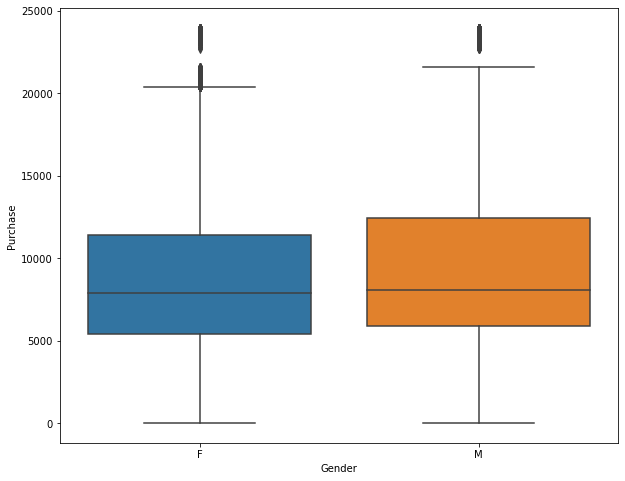

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Gender', y = 'Purchase', data = data)
plt.show()

<b>Insight :</b><br>
###### --->There are outlier values for purchase by both male and female

###### Analysing data based on gender male and removing outlier values

In [162]:
data_m=data.loc[data['Gender']=='M']

In [163]:
data_m.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686


In [50]:
p_25=data_m['Purchase'].quantile(.25)
p_25

5863.0

In [51]:
p_75=data_m['Purchase'].quantile(.75)
p_75

12454.0

In [52]:
iqr=p_75-p_25

In [53]:
lower=p_25-(1.5 * iqr)
upper=p_75+(1.5 * iqr)
print('IQR :',iqr)
print('Lower :',lower)
print('Upper :',upper)

IQR : 6591.0
Lower : -4023.5
Upper : 22340.5


In [54]:
male=data_m.loc[(data_m['Purchase']>lower)&(data_m['Purchase']<upper)]

###### Analysing data based on gender female and removing outlier values

In [164]:
data_f=data.loc[data['Gender']=='F']

In [165]:
data_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
14,1000006,P00231342,F,51-55,9,A,1,Unmarried,5,5378


In [55]:
p_25=data_f['Purchase'].quantile(.25)
p_25

5433.0

In [56]:
p_75=data_f['Purchase'].quantile(.75)
p_75

11400.0

In [57]:
iqr=p_75-p_25
lower=p_25-(1.5 * iqr)
upper=p_75+(1.5 * iqr)
print('IQR :',iqr)
print('Lower :',lower)
print('Upper :',upper)

IQR : 5967.0
Lower : -3517.5
Upper : 20350.5


In [58]:
female=data_f.loc[(data_f['Purchase']>lower)&(data_f['Purchase']<upper)]

<b>Insights :</b><br>
###### ---> Based on the observation we can say that average of male customers is more than that of female customers.

###### Checking Normal distribution of purchase by male 

In [ ]:
male_p=male['Purchase']

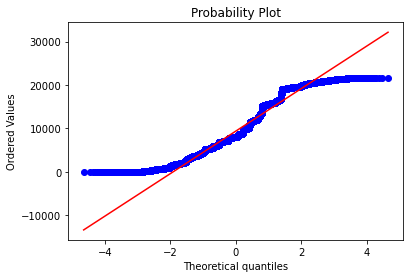

In [60]:
probplot(male_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution.

In [62]:
n_iteration=1000
bootstrap_mean_m=[]
for i in range(n_iteration):
    sample_data=male_p.sample(100000)
    bootstrap_mean_m.append(sample_data.mean())

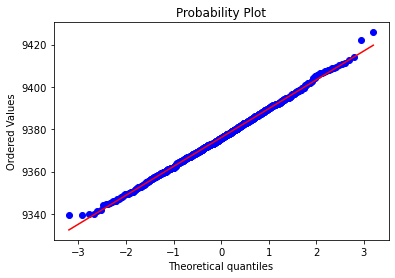

In [64]:
probplot(bootstrap_mean_m,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

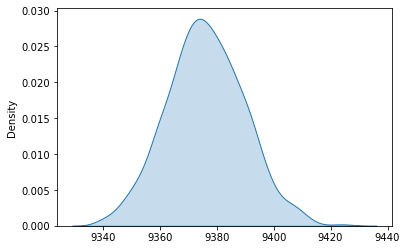

In [394]:
sns.kdeplot(bootstrap_mean_m,fill=True)
plt.show()

In [67]:
mean_of_bsm_m=np.mean(bootstrap_mean_m)

In [68]:
print('Mean of bootstrap mean of male :',mean_of_bsm_m.round(2))

Mean of bootstrap mean of male : 9376.08


In [69]:
std_of_bsm_m=np.std(bootstrap_mean_m)

In [70]:
print('Standard deviation of bootstrap mean of male :',std_of_bsm_m.round(2))

Standard deviation of bootstrap mean of male : 13.62


###### Confidence interval of purchase by male

In [71]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_m,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9353.54
Upper : 9398.55


##### 90% of confidence interval lies between 9352.86 and  9399.69

In [72]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_m,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9349.47
Upper : 9404.31


##### 95% of confidence interval lies between 9346.91 and 9403.97

In [73]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_m,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9342.01
Upper : 9410.94


##### 99% of confidence interval lies between  9340.79 and 9413.99

###### Checking Normal distribution of purchase by female 

In [74]:
female_p=female['Purchase']

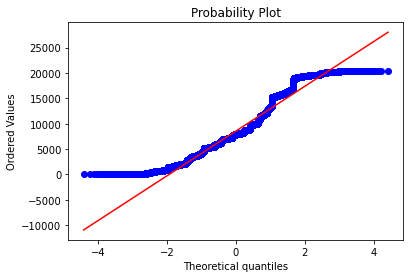

In [75]:
probplot(female_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution

In [76]:
n_iteration=1000
bootstrap_mean_f=[]
for i in range(n_iteration):
    sample_data=female_p.sample(100000)
    bootstrap_mean_f.append(sample_data.mean())

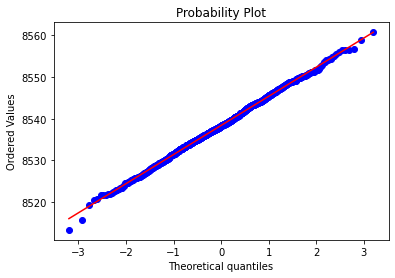

In [78]:
probplot(bootstrap_mean_f,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

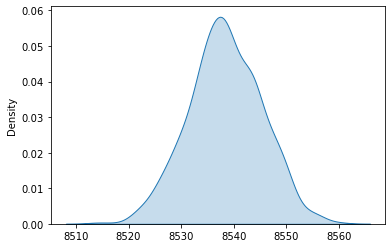

In [393]:
sns.kdeplot(bootstrap_mean_f,fill=True)
plt.show()

In [80]:
mean_of_bsm_f=np.mean(bootstrap_mean_f)

In [81]:
print('Mean of bootstrap mean of female :',mean_of_bsm_f.round(2))

Mean of bootstrap mean of female : 8538.38


In [82]:
std_of_bsm_f=np.std(bootstrap_mean_f)

In [83]:
print('Standard deviation of bootstrap mean of female :',std_of_bsm_f.round(2))

Standard deviation of bootstrap mean of female : 6.98


###### Confidence interval of purchase by female

In [84]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_f,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 8526.7
Upper : 8549.8


##### 90% of confidence interval lies between 8526.37 and  8550.3

In [85]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_f,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 8524.76
Upper : 8551.27


##### 95% of confidence interval lies between 8523.78 and 8553.03

In [86]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_f,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 8521.57
Upper : 8556.4


##### 99% of confidence interval lies between 8518.54 and 8557.08

###### Average Purchase of all male and female customers.

In [380]:
n_iteration=1000
bootstrap_mean_male=[]
for i in range(n_iteration):
    sample_data=male_p.sample(200)
    bootstrap_mean_male.append(sample_data.mean())

In [385]:
mean_m=np.mean(bootstrap_mean_male)
print('Average Purchase of male :',mean_m.round(2))

Average Purchase of male : 9383.88


In [381]:
n_iteration=1000
bootstrap_mean_female=[]
for i in range(n_iteration):
    sample_data=female_p.sample(200)
    bootstrap_mean_female.append(sample_data.mean())

In [386]:
mean_f=np.mean(bootstrap_mean_female)
print('Average Purchase of female :',mean_f.round(2))

Average Purchase of female : 8526.96


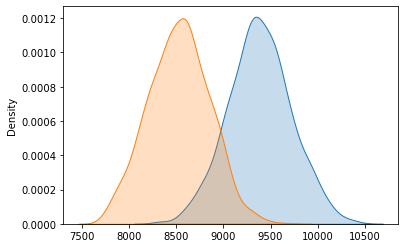

In [382]:
sns.kdeplot(bootstrap_mean_male,fill=True)
sns.kdeplot(bootstrap_mean_female,fill=True)
plt.show()

<b>Insights </b><br>
###### ---> Confidence intervals of average male and female Purchase are overlapping.

###### Outlier check on Purchase based on marital status

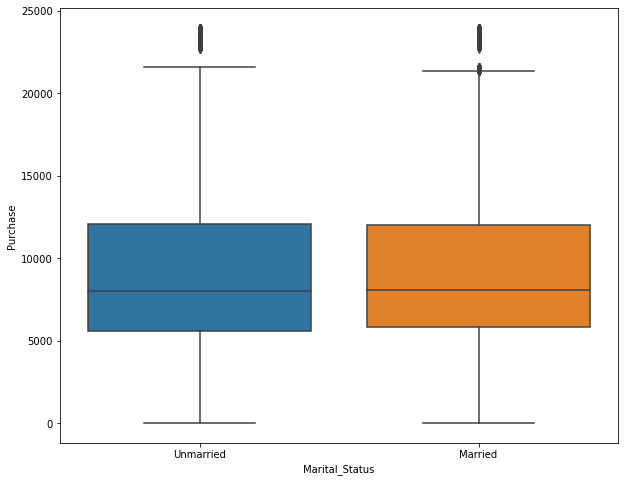

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = data)
plt.show()

<b>Insights </b><br>
###### --->There are outlier values in purchase based on merital status

###### Analysing data based on merital status Unmarried and removing outlier values

In [91]:
unmarried_data=data.loc[data['Marital_Status']=='Unmarried']

In [92]:
unmarried_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [93]:
p_25=unmarried_data['Purchase'].quantile(.25)
p_25

5605.0

In [94]:
p_75=unmarried_data['Purchase'].quantile(.75)
p_75

12061.0

In [95]:
iqr=p_75-p_25
lower=p_25-(1.5 * iqr)
upper=p_75+(1.5 * iqr)
print('IQR :',iqr)
print('Lower :',lower)
print('Upper :',upper)

IQR : 6456.0
Lower : -4079.0
Upper : 21745.0


In [96]:
unmarried=unmarried_data.loc[(unmarried_data['Purchase']>lower)&(unmarried_data['Purchase']<upper)]

###### Analysing data based on merital status Married and removing outlier values

In [97]:
married_data=data.loc[data['Marital_Status']=='Married']

In [98]:
married_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686
9,1000005,P00274942,M,26-35,20,A,1,Married,8,7871
10,1000005,P00251242,M,26-35,20,A,1,Married,5,5254


In [99]:
p_25=married_data['Purchase'].quantile(.25)
p_25

5843.0

In [100]:
p_75=married_data['Purchase'].quantile(.75)
p_75

12042.0

In [101]:
iqr=p_75-p_25
lower=p_25-(1.5 * iqr)
upper=p_75+(1.5 * iqr)
print('IQR :',iqr)
print('Lower :',lower)
print('Upper :',upper)

IQR : 6199.0
Lower : -3455.5
Upper : 21340.5


In [102]:
married=married_data.loc[(married_data['Purchase']>lower)&(married_data['Purchase']<upper)]

###### Checking Normal distribution of purchase by unmarried people.

In [103]:
unmarried_p=unmarried['Purchase']

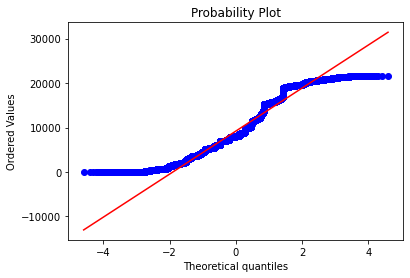

In [104]:
probplot(unmarried_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution

In [167]:
n_iteration=1000
bootstrap_mean_un=[]
for i in range(n_iteration):
    sample_data=unmarried_p.sample(100000)
    bootstrap_mean_un.append(sample_data.mean())

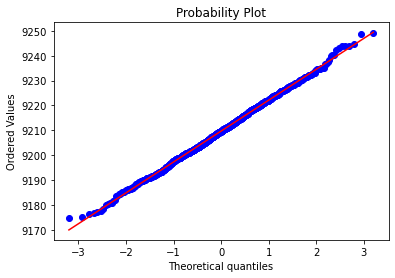

In [107]:
probplot(bootstrap_mean_un,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

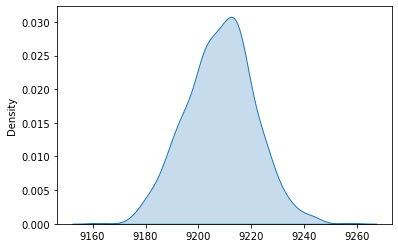

In [392]:
sns.kdeplot(bootstrap_mean_un,fill=True)
plt.show()

In [109]:
mean_of_bsm_un=np.mean(bootstrap_mean_un)
print('Mean of bootstrap mean of unmarried :',mean_of_bsm_un.round(2))

Mean of bootstrap mean of unmarried : 9209.69


In [110]:
std_of_bsm_un=np.std(bootstrap_mean_un)
print('Standard deviation of bootstrap mean of unmarried :',std_of_bsm_un.round(2))

Standard deviation of bootstrap mean of unmarried : 12.41


###### Confidence interval of purchase by unmarried people

In [111]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_un,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9189.81
Upper : 9229.82


##### 90% of confidence interval lies between 9187.63 and  9230.85

In [112]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_un,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9186.21
Upper : 9232.95


##### 95% of confidence interval lies between 9183.19 and  9234.42

In [113]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_un,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9177.53
Upper : 9243.9


##### 99% of confidence interval lies between 9176.59 and  9240.77

###### Checking Normal distribution of purchase by married people.

In [115]:
married_p=married['Purchase']

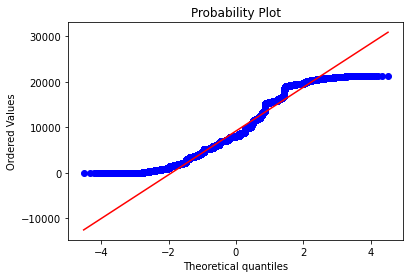

In [117]:
probplot(married_p,dist='norm',plot=plt)
plt.show()

In [118]:
n_iteration=1000
bootstrap_mean_mr=[]
for i in range(n_iteration):
    sample_data=married_p.sample(100000)
    bootstrap_mean_mr.append(sample_data.mean())

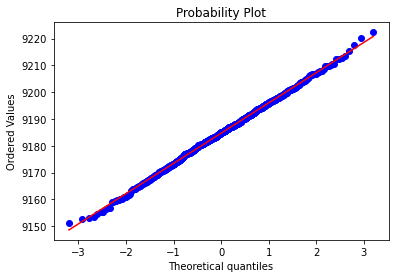

In [120]:
probplot(bootstrap_mean_mr,dist='norm',plot=plt)
plt.show()

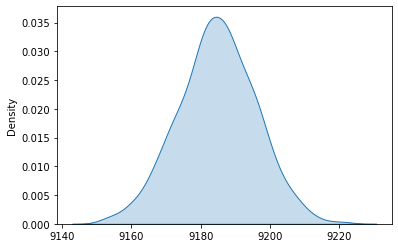

In [391]:
sns.kdeplot(bootstrap_mean_mr,fill=True)
plt.show()

In [123]:
mean_of_bsm_mr=np.mean(bootstrap_mean_mr)
print('Mean of bootstrap mean of married :',mean_of_bsm_mr.round(2))

Mean of bootstrap mean of married : 9184.71


In [124]:
std_of_bsm_mr=np.std(bootstrap_mean_mr)
print('Standard deviation of bootstrap mean of married :',std_of_bsm_mr.round(2))

Standard deviation of bootstrap mean of married : 11.25


###### Confidence interval of purchase by married people

In [125]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_mr,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9166.06
Upper : 9202.83


##### 90% of confidence interval lies between 9166.06 and 9202.83

In [128]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_mr,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9161.71
Upper : 9206.84


##### 95% of confidence interval lies between 9161.71 and 9206.84

In [127]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_mr,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9155.36
Upper : 9212.81


##### 99% of confidence interval lies between 9155.36 and 9212.81

###### Analysis based on age

In [188]:
age_0_17=data.loc[data['Age']=='0-17']
age_0_17

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
85,1000019,P00112542,M,0-17,10,A,3,Unmarried,1,7746
...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,0-17,10,C,1,Unmarried,20,256
550012,1005953,P00370853,M,0-17,10,B,0,Unmarried,19,26
550024,1005973,P00370293,M,0-17,10,C,4+,Unmarried,19,12
550035,1005989,P00370853,F,0-17,10,C,3,Unmarried,19,61


###### Checking Normal distribution of purchase by people of age 0 - 17.

In [190]:
age_0_17_p=age_0_17['Purchase']

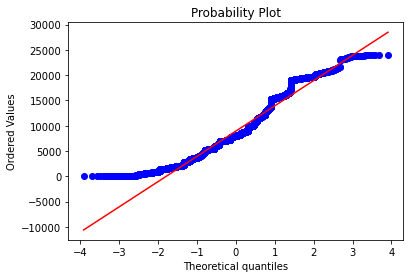

In [192]:
probplot(age_0_17_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution.

In [194]:
n_iteration=1000
bootstrap_mean_age_0_17=[]
sample_size=100000
for i in range(n_iteration):
    sample_data=resample(age_0_17_p,n_samples=sample_size)
    bootstrap_mean_age_0_17.append(sample_data.mean())

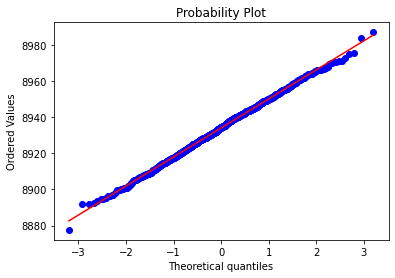

In [196]:
probplot(bootstrap_mean_age_0_17,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

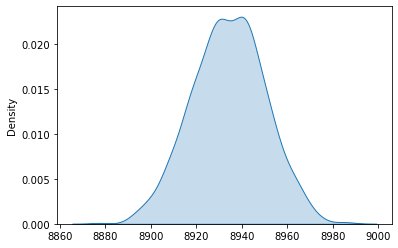

In [199]:
sns.kdeplot(bootstrap_mean_age_0_17,fill=True)
plt.show()

In [200]:
mean_of_bsm_17=np.mean(bootstrap_mean_age_0_17)
print('Mean of bootstrap mean of age 0 - 17 :',mean_of_bsm_17.round(2))

Mean of bootstrap mean of age 0 - 17 : 8934.07


In [201]:
std_of_bsm_17=np.std(bootstrap_mean_age_0_17)
print('Standard deviation of bootstrap mean of age 0 - 17 :',std_of_bsm_17.round(2))

Standard deviation of bootstrap mean of age 0 - 17 : 16.06


###### Confidence interval of purchase by age 0 - 17

In [202]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_age_0_17,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 8907.57
Upper : 8960.46


##### 90% of confidence interval lies between 8907.57 and 8960.46

In [203]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_age_0_17,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 8901.91
Upper : 8965.18


###### 95% of confidence interval lies between 8901.91 and 8965.18

In [204]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_age_0_17,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 8894.45
Upper : 8971.42


###### 99% of confidence interval lies between 8894.45 and 8971.42

In [206]:
age_18_25=data.loc[data['Age']=='18-25']
age_18_25

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
70,1000018,P00366542,F,18-25,3,B,3,Unmarried,5,1780
71,1000018,P00190742,F,18-25,3,B,3,Unmarried,3,10754
72,1000018,P00151842,F,18-25,3,B,3,Unmarried,4,2802
73,1000018,P00112642,F,18-25,3,B,3,Unmarried,1,19473
74,1000018,P00118442,F,18-25,3,B,3,Unmarried,1,19672
...,...,...,...,...,...,...,...,...,...,...
550000,1005936,P00370293,M,18-25,4,C,4+,Unmarried,19,14
550015,1005957,P00372445,M,18-25,20,B,1,Married,20,477
550017,1005959,P00371644,F,18-25,4,B,2,Married,20,363
550020,1005964,P00370293,M,18-25,5,B,1,Unmarried,19,36


###### Checking Normal distribution of purchase by people of age 18 - 25.

In [207]:
age_18_25_p=age_18_25['Purchase']

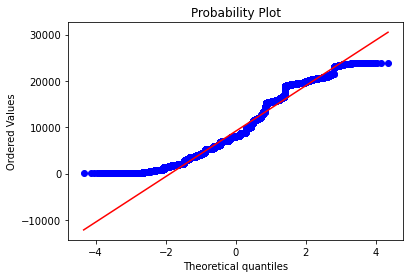

In [208]:
probplot(age_18_25_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution.

In [209]:
n_iteration=1000
bootstrap_mean_age_18_25=[]
sample_size=100000
for i in range(n_iteration):
    sample_data=resample(age_18_25_p,n_samples=sample_size)
    bootstrap_mean_age_18_25.append(sample_data.mean())

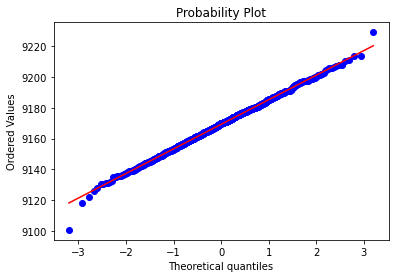

In [211]:
probplot(bootstrap_mean_age_18_25,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

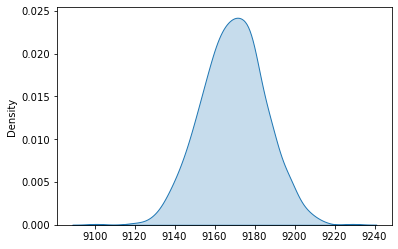

In [212]:
sns.kdeplot(bootstrap_mean_age_18_25,fill=True)
plt.show()

In [213]:
mean_of_bsm_25=np.mean(bootstrap_mean_age_18_25)
print('Mean of bootstrap mean of age 18 - 25 :',mean_of_bsm_25.round(2))

Mean of bootstrap mean of age 18 - 25 : 9169.25


In [214]:
std_of_bsm_25=np.std(bootstrap_mean_age_18_25)
print('Standard deviation of bootstrap mean of age 18 - 25 :',std_of_bsm_25.round(2))

Standard deviation of bootstrap mean of age 18 - 25 : 15.92


###### Confidence interval of purchase by age 18 - 25

In [215]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_age_18_25,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9142.81
Upper : 9196.2


###### 90% of confidence interval lies between 9142.81 and 9196.2

In [216]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_age_18_25,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9138.6
Upper : 9199.47


###### 95% of confidence interval lies between 9138.6 and 9199.47

In [217]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_age_18_25,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9130.33
Upper : 9207.97


###### 99% of confidence interval lies between 9130.33 and 9207.97

In [218]:
age_26_35=data.loc[data['Age']=='26-35']
age_26_35

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,15227
9,1000005,P00274942,M,26-35,20,A,1,Married,8,7871
10,1000005,P00251242,M,26-35,20,A,1,Married,5,5254
11,1000005,P00014542,M,26-35,20,A,1,Married,8,3957
12,1000005,P00031342,M,26-35,20,A,1,Married,8,6073
...,...,...,...,...,...,...,...,...,...,...
550058,1006024,P00372445,M,26-35,12,A,0,Married,20,121
550059,1006025,P00370853,F,26-35,1,B,1,Unmarried,19,48
550061,1006029,P00372445,F,26-35,1,C,1,Married,20,599
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371


###### Checking Normal distribution of purchase by people of age 26 - 35.

In [219]:
age_26_35_p=age_26_35['Purchase']

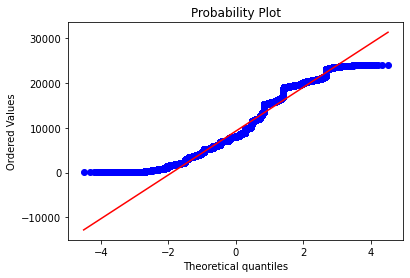

In [220]:
probplot(age_26_35_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution.

In [221]:
n_iteration=1000
bootstrap_mean_age_26_35=[]
sample_size=100000
for i in range(n_iteration):
    sample_data=resample(age_26_35_p,n_samples=sample_size)
    bootstrap_mean_age_26_35.append(sample_data.mean())

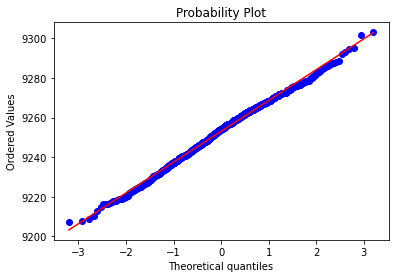

In [223]:
probplot(bootstrap_mean_age_26_35,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

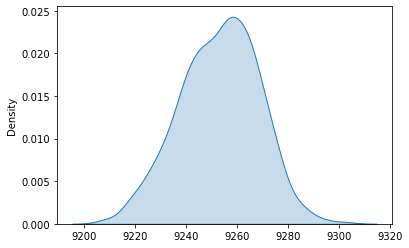

In [224]:
sns.kdeplot(bootstrap_mean_age_26_35,fill=True)
plt.show()

In [225]:
mean_of_bsm_35=np.mean(bootstrap_mean_age_26_35)
print('Mean of bootstrap mean of age 26-35 :',mean_of_bsm_35.round(2))
std_of_bsm_35=np.std(bootstrap_mean_age_26_35)
print('Standard deviation of bootstrap mean of age 26-35 :',std_of_bsm_35.round(2))

Mean of bootstrap mean of age 26-35 : 9253.03
Standard deviation of bootstrap mean of age 26-35 : 15.55


###### Confidence interval of purchase by age 26-35

In [226]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_age_26_35,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9226.17
Upper : 9276.37


##### 90% of confidence interval lies between 9226.17 and 9276.37

In [227]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_age_26_35,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9220.69
Upper : 9281.16


##### 95% of confidence interval lies between 9220.69 and 9281.16

In [228]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_age_26_35,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9214.84
Upper : 9291.84


##### 99% of confidence interval lies between 9214.84 and 9291.84

In [230]:
age_36_45=data.loc[data['Age']=='36-45']
age_36_45

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
18,1000007,P00036842,M,36-45,1,B,1,Married,1,11788
29,1000010,P00085942,F,36-45,1,B,4+,Married,2,16352
30,1000010,P00118742,F,36-45,1,B,4+,Married,5,8886
31,1000010,P00297942,F,36-45,1,B,4+,Married,8,5875
32,1000010,P00266842,F,36-45,1,B,4+,Married,5,8854
...,...,...,...,...,...,...,...,...,...,...
550049,1006011,P00375436,M,36-45,15,C,3,Unmarried,20,473
550050,1006012,P00371644,M,36-45,15,C,4+,Married,20,368
550053,1006017,P00371644,F,36-45,7,B,1,Unmarried,20,371
550054,1006018,P00370293,M,36-45,1,C,3,Unmarried,19,60


###### Checking Normal distribution of purchase by people of age 36-45.

In [231]:
age_36_45_p=age_36_45['Purchase']

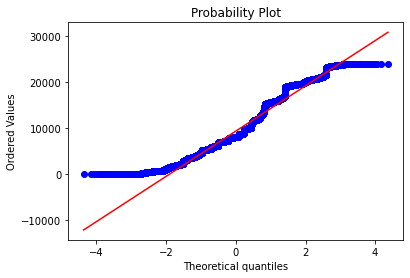

In [232]:
probplot(age_36_45_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution.

In [233]:
n_iteration=1000
bootstrap_mean_age_36_45=[]
sample_size=100000
for i in range(n_iteration):
    sample_data=resample(age_36_45_p,n_samples=sample_size)
    bootstrap_mean_age_36_45.append(sample_data.mean())

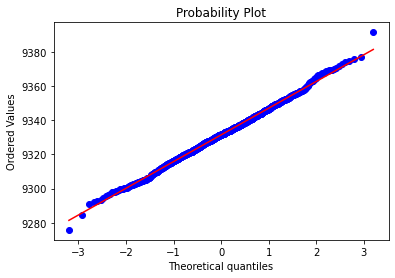

In [235]:
probplot(bootstrap_mean_age_36_45,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

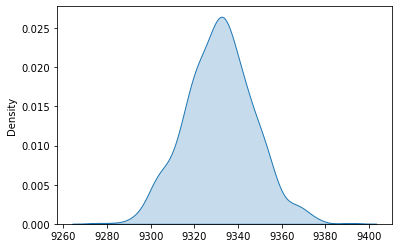

In [236]:
sns.kdeplot(bootstrap_mean_age_36_45,fill=True)
plt.show()

In [237]:
mean_of_bsm_45=np.mean(bootstrap_mean_age_36_45)
print('Mean of bootstrap mean of age 36-45 :',mean_of_bsm_45.round(2))
std_of_bsm_45=np.std(bootstrap_mean_age_36_45)
print('Standard deviation of bootstrap mean of age 36-45 :',std_of_bsm_45.round(2))

Mean of bootstrap mean of age 36-45 : 9331.48
Standard deviation of bootstrap mean of age 36-45 : 15.63


###### Confidence interval of purchase by age 36-45

In [238]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_age_36_45,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9305.01
Upper : 9356.83


##### 90% of confidence interval lies between 9305.01 and 9356.83

In [239]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_age_36_45,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9301.14
Upper : 9364.12


###### 95% of confidence interval lies between 9301.14 and 9364.12

In [240]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_age_36_45,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9293.38
Upper : 9372.88


###### 99% of confidence interval lies between 9293.38 and 9372.88

In [241]:
age_46_50=data.loc[data['Age']=='46-50']
age_46_50

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686
52,1000013,P00129542,M,46-50,1,C,3,Married,8,5839
53,1000013,P00140742,M,46-50,1,C,3,Married,1,15912
...,...,...,...,...,...,...,...,...,...,...
550041,1006000,P00371644,M,46-50,17,B,2,Married,20,488
550043,1006003,P00370293,F,46-50,17,C,1,Unmarried,19,48
550052,1006016,P00375436,M,46-50,1,B,1,Married,20,239
550062,1006032,P00372445,M,46-50,7,A,3,Unmarried,20,473


###### Checking Normal distribution of purchase by people of age 46-50.

In [242]:
age_46_50_p=age_46_50['Purchase']

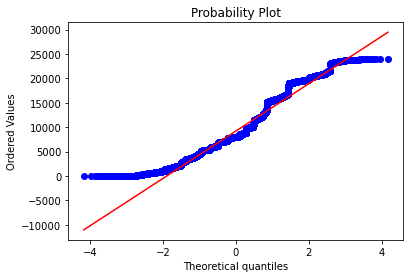

In [243]:
probplot(age_46_50_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution.

In [244]:
n_iteration=1000
bootstrap_mean_age_46_50=[]
sample_size=100000
for i in range(n_iteration):
    sample_data=resample(age_46_50_p,n_samples=sample_size)
    bootstrap_mean_age_46_50.append(sample_data.mean())

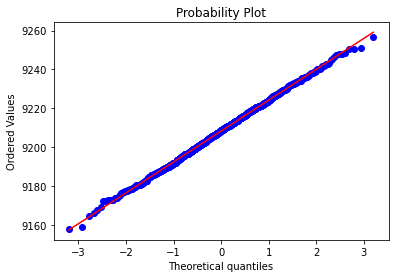

In [246]:
probplot(bootstrap_mean_age_46_50,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

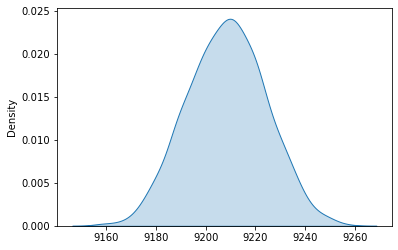

In [247]:
sns.kdeplot(bootstrap_mean_age_46_50,fill=True)
plt.show()

In [248]:
mean_of_bsm_50=np.mean(bootstrap_mean_age_46_50)
print('Mean of bootstrap mean of age 46-50 :',mean_of_bsm_50.round(2))
std_of_bsm_50=np.std(bootstrap_mean_age_46_50)
print('Standard deviation of bootstrap mean of age 46-50 :',std_of_bsm_50.round(2))

Mean of bootstrap mean of age 46-50 : 9208.39
Standard deviation of bootstrap mean of age 46-50 : 15.83


###### Confidence interval of purchase by age 46 - 50

In [249]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_age_46_50,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9181.6
Upper : 9234.11


##### 90% of confidence interval lies between 9181.6 and 9234.11

In [250]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_age_46_50,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9178.19
Upper : 9238.47


###### 95% of confidence interval lies between 9178.19 and 9238.47

In [251]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_age_46_50,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9169.4
Upper : 9248.06


###### 99% of confidence interval lies between 9169.4 and 9169.4

In [252]:
age_51_55=data.loc[data['Age']=='51-55']
age_51_55

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
14,1000006,P00231342,F,51-55,9,A,1,Unmarried,5,5378
15,1000006,P00190242,F,51-55,9,A,1,Unmarried,4,2079
16,1000006,P0096642,F,51-55,9,A,1,Unmarried,2,13055
17,1000006,P00058442,F,51-55,9,A,1,Unmarried,5,8851
67,1000017,P00019342,M,51-55,1,C,0,Unmarried,1,15872
...,...,...,...,...,...,...,...,...,...,...
549985,1005916,P00370853,M,51-55,20,B,1,Married,19,24
550004,1005940,P00370853,M,51-55,12,C,1,Married,19,12
550037,1005993,P00370293,F,51-55,20,C,1,Married,19,62
550042,1006002,P00371644,M,51-55,0,C,1,Married,20,243


###### Checking Normal distribution of purchase by people of age 51 - 55.

In [253]:
age_51_55_p=age_51_55['Purchase']

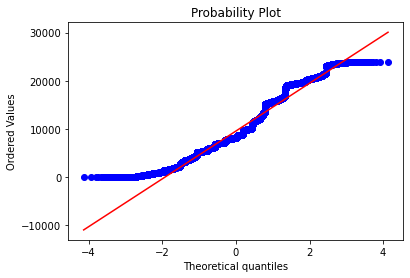

In [254]:
probplot(age_51_55_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution.

In [256]:
n_iteration=1000
bootstrap_mean_age_51_55=[]
sample_size=100000
for i in range(n_iteration):
    sample_data=resample(age_51_55_p,n_samples=sample_size)
    bootstrap_mean_age_51_55.append(sample_data.mean())

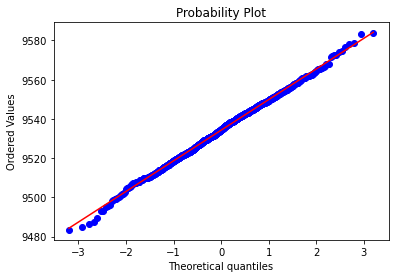

In [258]:
probplot(bootstrap_mean_age_51_55,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

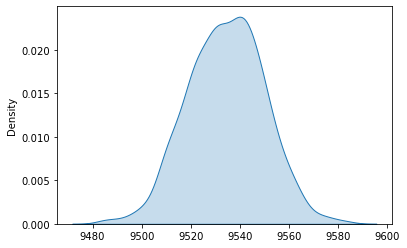

In [260]:
sns.kdeplot(bootstrap_mean_age_51_55,fill=True)
plt.show()

In [261]:
mean_of_bsm_55=np.mean(bootstrap_mean_age_51_55)
print('Mean of bootstrap mean of age 51-55 :',mean_of_bsm_55.round(2))
std_of_bsm_55=np.std(bootstrap_mean_age_51_55)
print('Standard deviation of bootstrap mean of age 51-55 :',std_of_bsm_55.round(2))

Mean of bootstrap mean of age 51-55 : 9534.24
Standard deviation of bootstrap mean of age 51-55 : 15.58


###### Confidence interval of purchase by age 51 - 55 

In [262]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_age_51_55,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9509.57
Upper : 9559.35


##### 90% of confidence interval lies between 9509.57 and 9559.35

In [263]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_age_51_55,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9504.85
Upper : 9563.28


###### 95% of confidence interval lies between 9504.85 and 9563.28

In [264]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_age_51_55,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9492.97
Upper : 9574.76


###### 99% of confidence interval lies between 9492.97 and 9574.76

In [265]:
age_gt_55=data.loc[data['Age']=='55+']
age_gt_55

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
159,1000031,P00117442,M,55+,7,C,2,Unmarried,5,8596
160,1000031,P00322042,M,55+,7,C,2,Unmarried,5,5248
161,1000031,P00216342,M,55+,7,C,2,Unmarried,3,10592
162,1000031,P00329342,M,55+,7,C,2,Unmarried,5,3482
...,...,...,...,...,...,...,...,...,...,...
549925,1005834,P00371644,M,55+,16,C,4+,Unmarried,20,121
549989,1005922,P00370853,M,55+,3,C,3,Unmarried,19,12
550008,1005946,P00370853,F,55+,1,A,0,Unmarried,19,50
550030,1005980,P00372445,M,55+,1,C,3,Unmarried,20,376


###### Checking Normal distribution of purchase by people of age 55+.

In [266]:
age_gt_55_p=age_gt_55['Purchase']

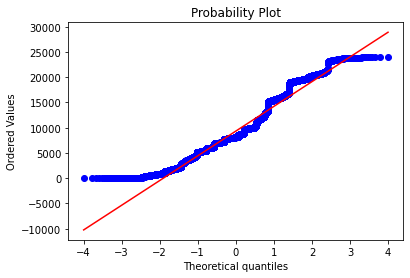

In [267]:
probplot(age_gt_55_p,dist='norm',plot=plt)
plt.show()

It does not satisfy normal distribution.

In [269]:
n_iteration=1000
bootstrap_mean_age_gt_55=[]
sample_size=100000
for i in range(n_iteration):
    sample_data=resample(age_gt_55_p,n_samples=sample_size)
    bootstrap_mean_age_gt_55.append(sample_data.mean())

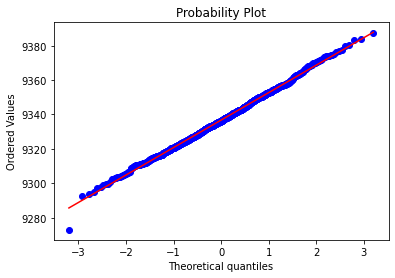

In [271]:
probplot(bootstrap_mean_age_gt_55,dist='norm',plot=plt)
plt.show()

Now it satisfy normal distribution

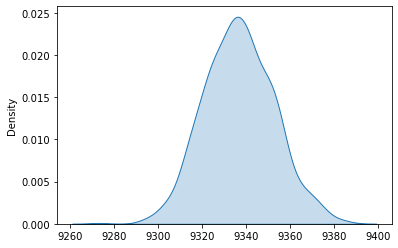

In [272]:
sns.kdeplot(bootstrap_mean_age_gt_55,fill=True)
plt.show()

In [273]:
mean_of_bsm_gt55=np.mean(bootstrap_mean_age_gt_55)
print('Mean of bootstrap mean of age 55+ :',mean_of_bsm_gt55.round(2))
std_of_bsm_gt55=np.std(bootstrap_mean_age_gt_55)
print('Standard deviation of bootstrap mean of age 55+ :',std_of_bsm_gt55.round(2))

Mean of bootstrap mean of age 55+ : 9336.74
Standard deviation of bootstrap mean of age 55+ : 15.95


###### Confidence interval of purchase by age greater than 55

In [274]:
confidence=90
lower,upper=np.percentile(bootstrap_mean_age_gt_55,[5,95])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9311.6
Upper : 9363.76


##### 90% of confidence interval lies between 9311.6 and 9363.76

In [275]:
confidence=95
lower,upper=np.percentile(bootstrap_mean_age_gt_55,[2.5,97.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9306.55
Upper : 9370.01


###### 95% of confidence interval lies between 9306.55 and 9370.01

In [276]:
confidence=99
lower,upper=np.percentile(bootstrap_mean_age_gt_55,[.5,99.5])
print('Lower :',lower.round(2))
print('Upper :',upper.round(2))

Lower : 9297.88
Upper : 9377.32


###### 99% of confidence interval lies between 9297.88 and 9377.32

##### Visual Analysis - Univariate & Bivariate

###### Analysis based on gender

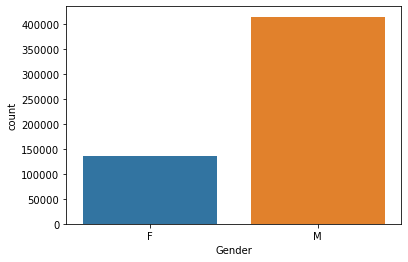

In [301]:
sns.countplot(data['Gender'])    
plt.show()

<b>Insights :</b><br>
###### ---> Based on the observation we can say that people who purchased the most are male.

###### Analysis based on Marital_Status

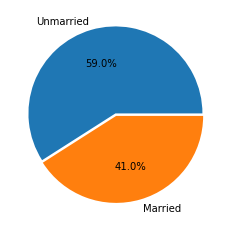

In [302]:
plt.pie(data['Marital_Status'].value_counts(),explode=(0.02,0.01), labels=data['Marital_Status'].unique(),autopct='%.1f%%')
plt.show()

<b>Insights :</b><br>
###### ---> Based on the observation we can say that people who purchased the most are unmarried.

###### Analysis based on age

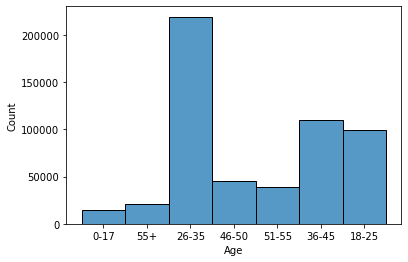

In [303]:
sns.histplot(data['Age'])    
plt.show()

<b>Insights :</b><br>
###### ---> Based on the observation we can say that people having age from 26 to 35 purchased the most.

###### Most selling 5 products in Walmart.

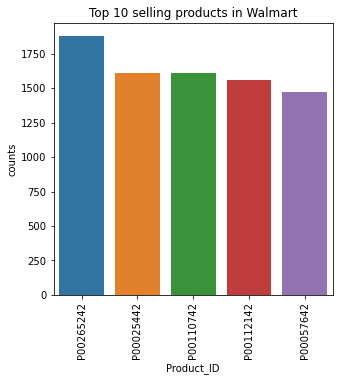

In [282]:
plt.figure(figsize=(5,5))
dp=data['Product_ID'].value_counts().rename_axis('Product_ID').reset_index(name='counts')[:5]
sns.barplot(data=dp,  x="Product_ID",y='counts')
plt.xticks( rotation = 90)
plt.title('Top 5 selling products in Walmart')
plt.show()

<b>Insights :</b>
###### ---> Product with ID P00265242 is the most sold product in Walmart

###### Analysis based on Occupation

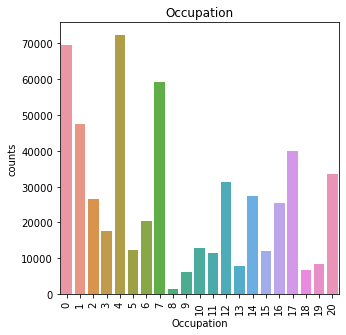

In [291]:
plt.figure(figsize=(5,5))
rate=data['Occupation'].value_counts().rename_axis('Occupation').reset_index(name='counts')
sns.barplot(data=rate, x="Occupation",y='counts')
plt.xticks( rotation = 90)
plt.title('Occupation')
plt.show()

<b>Insights :</b><br>
###### ---> Based on the observation we can say that people having occupation 4 purchased the most.

###### Analysis based on City_Category

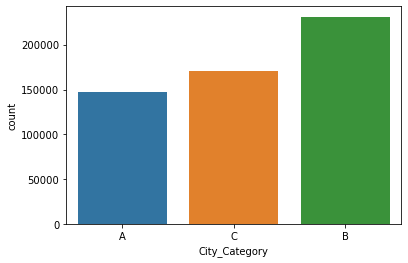

In [297]:
sns.countplot(data['City_Category'])    
plt.show()

<b>Insights :</b><br>
###### ---> Based on the observation we can say that people in City_Category B purchased the most.

###### Analysis based on Stay_In_Current_City_Years

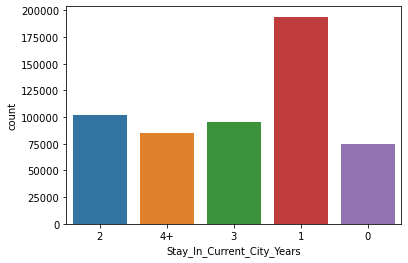

In [299]:
sns.countplot(data['Stay_In_Current_City_Years'])    
plt.show()

<b>Insights :</b><br>
###### ---> Based on the observation we can say that most of people who purchased from Walmart stayed in the city only for 1 years

###### Analysis based on Product_Category

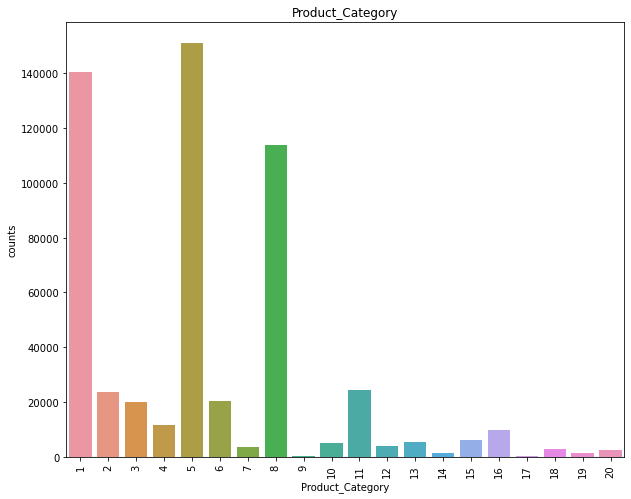

In [397]:
plt.figure(figsize=(10,8))
rate=data['Product_Category'].value_counts().rename_axis('Product_Category').reset_index(name='counts')
sns.barplot(data=rate, x="Product_Category",y='counts')
plt.xticks( rotation = 90)
plt.title('Product_Category')
plt.show()

<b>Insights :</b><br>
###### ---> Based on the observation we can say that most of people purchased Product_Category 1,5 and 8. 

###### Relation between age and gender

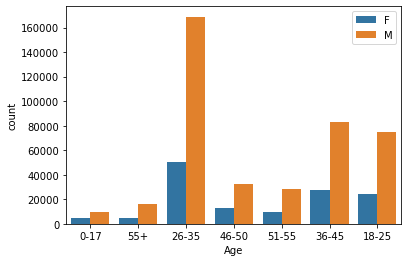

In [339]:
sns.countplot(x = 'Age', data = data, hue = 'Gender')
plt.legend() 
plt.show()

###### Relation between age and Marital_Status

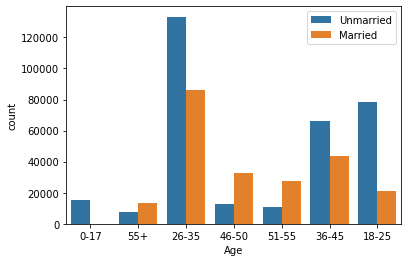

In [346]:
sns.countplot(x = 'Age', data = data, hue = 'Marital_Status')
plt.legend() 
plt.show()

###### Analysing City_Category based on age and purchase.

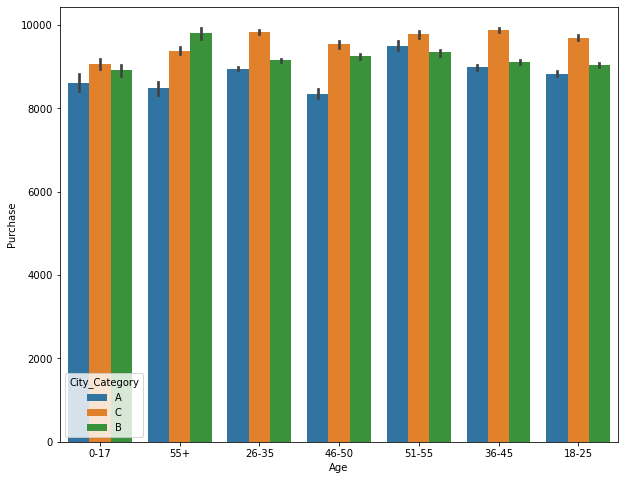

In [398]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Age',y='Purchase' ,data = data, hue = 'City_Category')
plt.show()

###### Analysing occupation based on purchase 

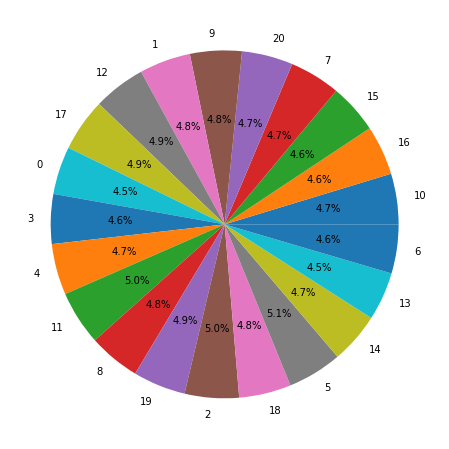

In [417]:
df=data.groupby('Occupation')['Purchase'].mean()
plt.figure(figsize=(10,8))
plt.pie(df,labels=data['Occupation'].unique(),autopct='%.1f%%')
plt.show()

<b>Insights :</b><br>
###### ---> Based on the observation we can say that occupation 5,2 and 11 has more purchase average than other occupations

###### Analysing the relationships between numerical variables

In [330]:
data_correlation=data.corr()

In [328]:
data_correlation

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.003825,0.004716
Occupation,-0.023971,1.000000,-0.007618,0.020833
Product_Category,0.003825,-0.007618,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.343703,1.000000


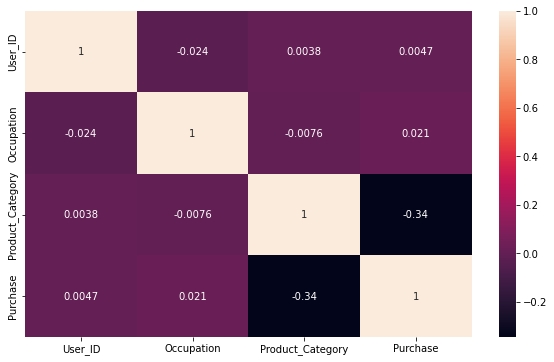

In [327]:
plt.figure(figsize=(10,6))
sns.heatmap(data_correlation, annot=True)
plt.show()

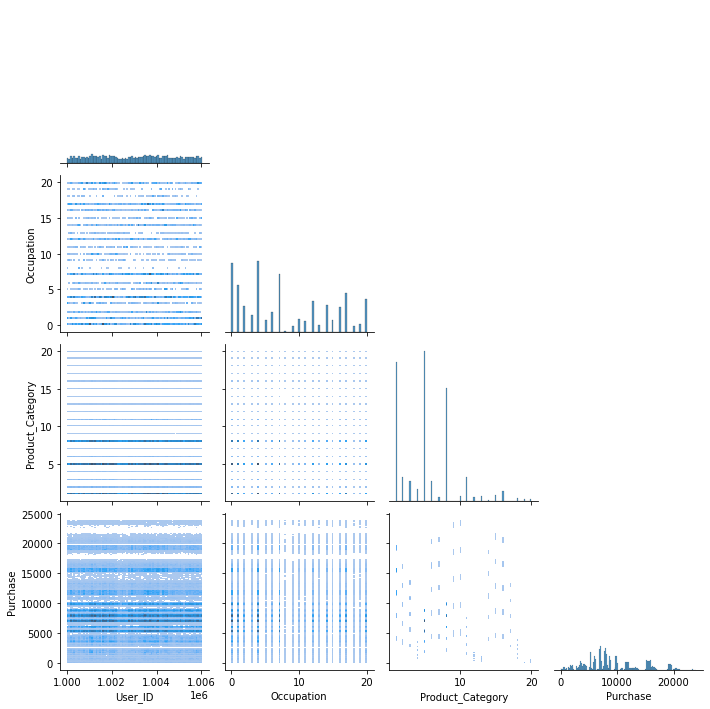

In [388]:
sns.pairplot(data, corner = True,kind='hist')
plt.show()

### Insights<br>
1. Based on the observation we can say that the probability of  marital status of female married is 25.29% of the total observations.<br><br>
2. Based on the observation we can say that the probability of  marital status of male married is 74.71% of the total observations.<br><br>
3. Based on the observation we can say that the probability of  marital status of female unmarried is 24.27% of the total observations.<br><br>
4. Based on the observation we can say that the probability of  marital status of male unmarried is 75.73% of the total observations.<br><br>
5. Based on the observation we can say that the probability of  female in age 0 - 17 is 33.66% of the total observations.<br><br>
6. Based on the observation we can say that the probability of  male in age 0 - 17 is 66.34% of the total observations.<br><br>
7. Based on the observation we can say that the probability of  female in age 18 - 25 is 24.71% of the total observations.<br><br>
8. Based on the observation we can say that the probability of  male in age 18 - 25 is 75.29% of the total observations.<br><br>
9. Based on the observation we can say that the probability of  female in age 26 - 35 is 23.11% of the total observations.<br><br>
10. Based on the observation we can say that the probability of  male in age 26 - 35 is 76.89% of the total observations.<br><br>
11. Based on the observation we can say that the probability of  female in age 36 - 45 is 24.70% of the total observations.<br><br>
12. Based on the observation we can say that the probability of  male in age 36 - 45 is 75.30% of the total observations.<br><br>
13. Based on the observation we can say that the probability of  female in age 46 - 50 is 28.88	% of the total observations.<br><br>
14. Based on the observation we can say that the probability of  male in age 46 - 50 is 71.12% of the total observations.<br><br>
15. Based on the observation we can say that the probability of  female in age 51-55 is 25.70% of the total observations.<br><br>
16. Based on the observation we can say that the probability of  male in age 51-55 is 74.30% of the total observations.<br><br>
17. Based on the observation we can say that the probability of  female in age greater than 55 is 23.64% of the total observations.<br><br>
18. Based on the observation we can say that the probability of  male in age greater than 55 is 76.36% of the total observations.<br><br>
19. Confidence interval of purchase by male<br><br>
90% of confidence interval lies between 9352.86 and 9399.69<br>
95% of confidence interval lies between 9346.91 and 9403.97<br>
99% of confidence interval lies between 9340.79 and 9413.99<br><br>
20. Confidence interval of purchase by female<br><br>
90% of confidence interval lies between 8526.37 and 8550.3<br>
95% of confidence interval lies between 8523.78 and 8553.03<br>
99% of confidence interval lies between 8518.54 and 8557.08<br><br>
21. Confidence interval of purchase by unmarried people<br><br>
90% of confidence interval lies between 9187.63 and 9230.85<br>
95% of confidence interval lies between 9183.19 and 9234.42<br>
99% of confidence interval lies between 9176.59 and 9240.77<br><br>
22. Confidence interval of purchase by married people<br><br>
90% of confidence interval lies between 9166.06 and 9202.83<br>
95% of confidence interval lies between 9161.71 and 9206.84<br>
99% of confidence interval lies between 9155.36 and 9212.81<br><br>
23. Confidence interval of purchase by age 0 - 17<br><br>
90% of confidence interval lies between 8907.57 and 8960.46<br>
95% of confidence interval lies between 8901.91 and 8965.18<br>
99% of confidence interval lies between 8894.45 and 8971.42<br><br>
24. Confidence interval of purchase by age 18 - 25<br><br>
90% of confidence interval lies between 9142.81 and 9196.2<br>
95% of confidence interval lies between 9138.6 and 9199.47<br>
99% of confidence interval lies between 9130.33 and 9207.97<br><br>
25. Confidence interval of purchase by age 26-35<br><br>
90% of confidence interval lies between 9226.17 and 9276.37<br>
95% of confidence interval lies between 9220.69 and 9281.16<br>
99% of confidence interval lies between 9214.84 and 9291.84<br><br>
26. Confidence interval of purchase by age 36-45<br><br>
90% of confidence interval lies between 9305.01 and 9356.83<br>
95% of confidence interval lies between 9301.14 and 9364.12<br>
99% of confidence interval lies between 9293.38 and 9372.88<br><br>
27. Confidence interval of purchase by age 46 - 50<br><br>
90% of confidence interval lies between 9181.6 and 9234.11<br>
95% of confidence interval lies between 9178.19 and 9238.47<br>
99% of confidence interval lies between 9169.4 and 9169.4<br><br>
28. Confidence interval of purchase by age 51 - 55<br><br>
90% of confidence interval lies between 9509.57 and 9559.35<br>
95% of confidence interval lies between 9504.85 and 9563.28<br>
99% of confidence interval lies between 9492.97 and 9574.76<br><br>
29. Confidence interval of purchase by age greater than 55<br><br>
90% of confidence interval lies between 9311.6 and 9363.76<br>
95% of confidence interval lies between 9306.55 and 9370.01<br>
99% of confidence interval lies between 9297.88 and 9377.32<br><br>
30. Based on the observation we can say that people who purchased the most are male.<br><br>
31. Based on the observation we can say that people who purchased the most are unmarried.<br><br>
32. Based on the observation we can say that people having age from 26 to 35 purchased the most.<br><br>
33. Product with ID P00265242 is the most sold product in Walmart.<br><br>
34. Based on the observation we can say that people having occupation 4 purchased the most.<br><br>
35. Based on the observation we can say that people in City_Category B purchased the most.<br><br>
36. Based on the observation we can say that most of people who purchased from Walmart stayed in the city only for 1 years.<br><br>
37. Based on the observation we can say that most of people purchased Product_Category 1,5 and 8.<br><br>
38. Based on the observation we can say that average of male customers is more than that of female customers.<br><br>
39. Confidence intervals of average male and female Purchase are overlapping.<br><br>
40. Based on the observation we can say that occupation 5,2 and 11 has more purchase average than other occupations

### Recommendations<br>

1. Product with ID P00265242,P00025442,P00110742 are the most sold products in Walmart,Walmart should focus of these product to increase purchase.<br><br>
2. People who purchased the most from walmart are male,Walmart should focus on products that are mainly used by male customers.<br><br>
3. People in City Category B purchased the more than A and C.Walmart should focus on City Category B since more purchases are from there.<br><br> 
4. Most of people purchased Product Category 1,5 and 8,Walmart should focus on these category of product to increase their purchase.<br><br>
5. People having age from 26 to 35 purchased the most of the products from walmart,Walmart should focus on products likely to people in this age.<br><br>
6. Unmarried peoples by more products than married peoples,Walmart should focus on products that are more used by unmarried people.